In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

En este notebook vamos a seguir trabajando con el dataset de predicción de bancarrota a partir de 5 factores financieros.

In [2]:
bankruptcy = pd.read_csv("https://raw.githubusercontent.com/christianolivamoya/MIAX11-ML/main/data/bankruptcy.csv", index_col='Company')

In [3]:
bankruptcy.head()

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL,Bankrupt
Company,,,,,,
360Networks,9.3,-7.7,1.6,9.1,3.726,yes
Advanced Radio Telecom,42.6,-60.1,-10.1,0.3,4.130,yes
Ardent Communications,-28.8,-203.2,-51.0,14.7,0.111,yes
At Home Corp.,2.5,-433.1,-6.0,29.3,1.949,yes
Convergent Communications,26.1,-57.4,-23.5,54.2,0.855,yes


Vamos a explorar la distribución de los atributos. Primero, vamos a ver cierta información utilizando el `describe` de Pandas.

In [4]:
bankruptcy.describe()

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.818000,-52.936000,-7.622000,39.794000,3.004240
std,34.269012,90.073681,26.611454,30.862939,5.425038
min,-127.500000,-433.100000,-98.700000,0.300000,0.028000
25%,-5.700000,-75.225000,-12.275000,21.075000,0.566000
50%,5.350000,-38.550000,-2.450000,33.550000,1.405500
75%,25.050000,0.000000,9.025000,51.025000,3.317250
max,74.700000,54.600000,27.900000,127.800000,35.178000


Fíjate en lo que sucede con la `std` de `RE/TA`. Tenemos una desviación de 90 y un mínimo, media y máximo de -433, -52.93 y 54.60. Aparentemente algo está sucediendo. Veamos su distribución con un histograma.

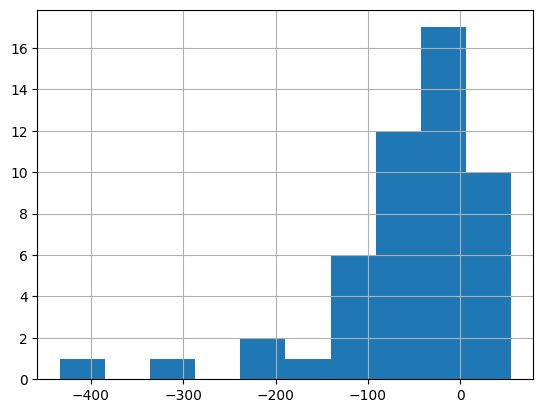

In [5]:
bankruptcy['RE/TA'].hist()
plt.show()

Las distrubución por clases y los gráficos por pares nos ayudan a verificar la varianza de las variables y a intuir la capacidad de separar los ejemplos que podría tener un clasificador.

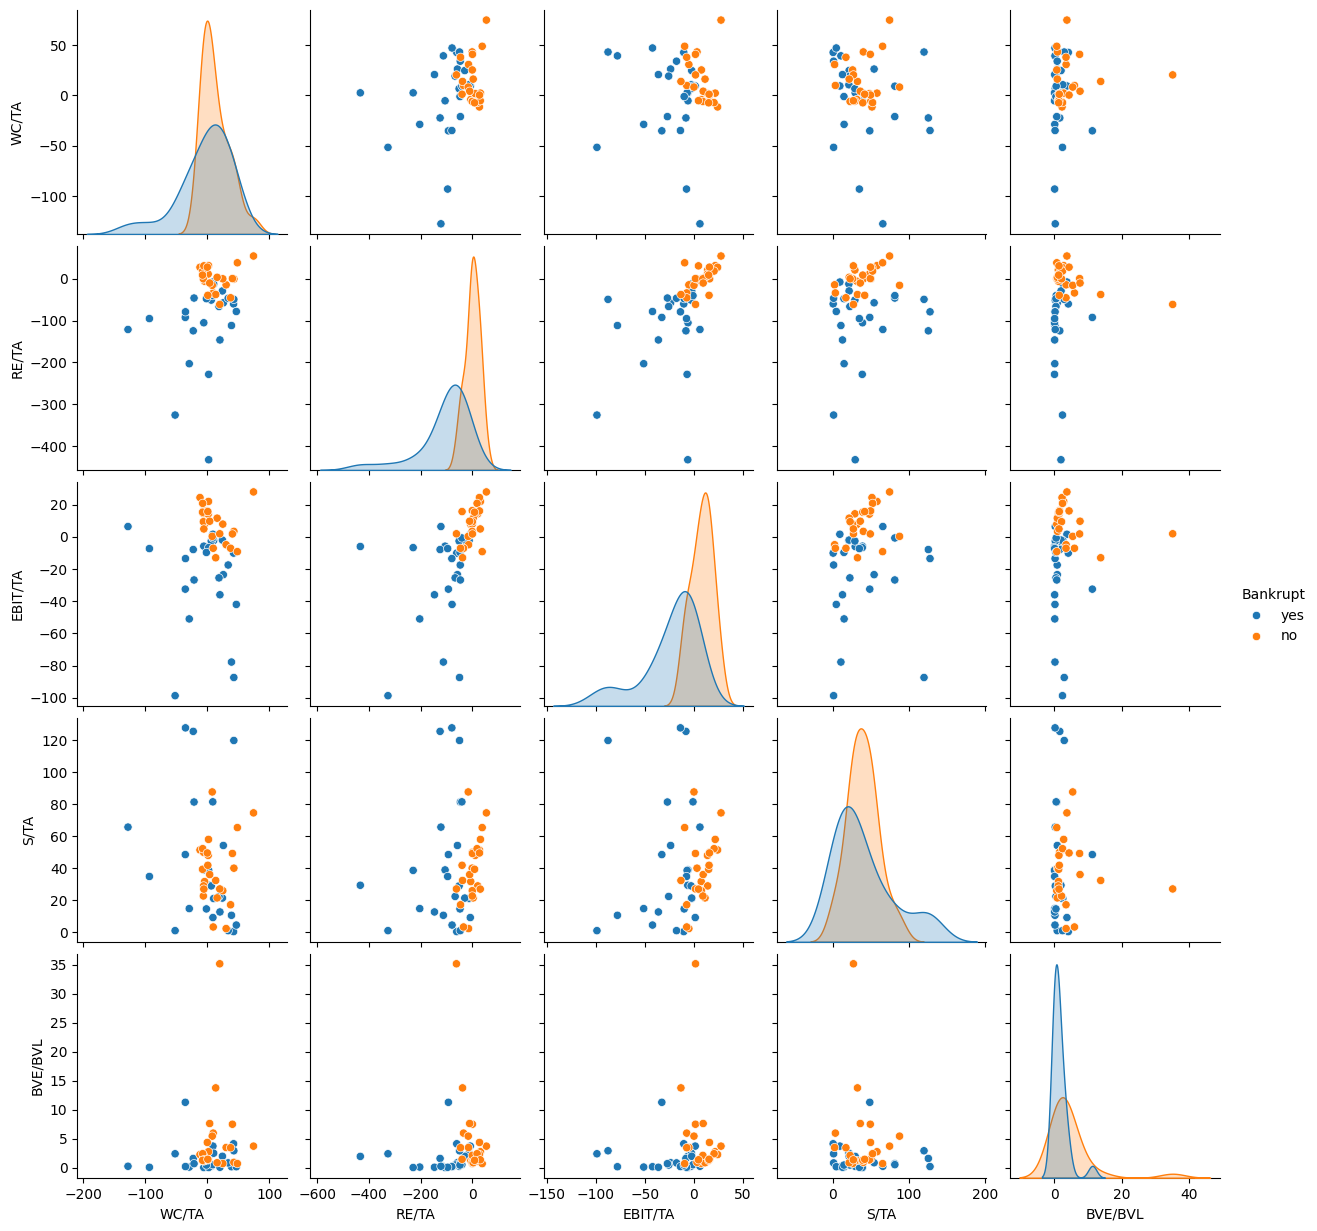

In [6]:
sns.pairplot(bankruptcy, hue='Bankrupt')

___

### Ejercicio

El fichero data/bankrupt_missing.csv es el mismo fichero de ejemplo que intencionadamente
hemos borrando o cambiado por n.a. algunos valores para que simulen valores omitidos

In [7]:
bankrupt2 = pd.read_csv('https://raw.githubusercontent.com/christianolivamoya/MIAX11-ML/main/data/bankrupt_missing.csv', index_col='Company')

Queremos:
1. Construir un dataframe que descarte los ejemplos con valores omitidos
2. Construir un dataframe que utilice todos los ejemplos y que impute la media a los valores omitidos

In [8]:
# El dataset contiene 5 atributos numéricos y un atributo categórico
bankrupt2.sample(5)

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL,Bankrupt
Company,,,,,,
BellSouth,-11.5,27.6,24.4,51.4,2.266,no
NetVoice Technologies,-21.1,-46.0,-26.8,81.4,0.698,yes
Telephone and Data Systems,-5.3,31.0,4.9,26.9,1.362,no
U.S. Wireless,-51.6,-326.1,-98.7,0.9,2.402,yes
PSINet,2.5,-228.7,-6.7,38.6,0.03,yes


In [9]:
# Comprobamos con un dtypes si todos los atributos están siendo procesados correctamente
# No es el caso, BVE/BVL es de tipo object cuando debería ser float
bankrupt2.dtypes

WC/TA       float64
RE/TA       float64
EBIT/TA     float64
S/TA        float64
BVE/BVL      object
Bankrupt     object
dtype: object

In [10]:
# Es necesario transformar BVE/BVL a float. Intentémoslo:
bankrupt2["BVE/BVL"] = bankrupt2["BVE/BVL"].astype(float)

# Esta celda debe dar el siguiente error:
# ValueError: could not convert string to float: 'n.a.'

ValueError: could not convert string to float: 'n.a.'

In [11]:
# Vamos a definir una función para detectar dónde hay valores no numéricos en esa columna
def is_not_number(x):
    try:
        float(x)
        return False
    except:
        print(" > This is not a number:", x)
        return True

mask = bankrupt2['BVE/BVL'].map(lambda x: is_not_number(x))
# Resulta que Infonet tiene n.a. como valor en esa columna
mask[mask == True]

 > This is not a number: n.a.


Company
Infonet    True
Name: BVE/BVL, dtype: bool

In [15]:
### OPCION 1: Queremos eliminar las filas que tengan valores inválidos
# Es lo mismo que decir: me quedo con los que no son invalidos
bankrupt2_opcion1 = bankrupt2.iloc[np.where(mask == False)[0]].copy() # Hago una copia para que no sea una vista

### OPCION 2: Queremos reemplazar las filas que tengan valores inválidos por la media
# Por ahora, vamos a rellenar con NaN
bankrupt2_opcion2 = bankrupt2.replace('n.a.', np.nan)

# Comprueba que esa fila tiene un NaN de numpy
bankrupt2_opcion2.iloc[np.where(mask)[0]]

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL,Bankrupt
Company,,,,,,
Infonet,40.7,0.6,1.8,49.2,NaN,no


In [16]:
# En ambos casos, ahora sí podemos transformar la columna a float
bankrupt2_opcion1["BVE/BVL"] = bankrupt2_opcion1["BVE/BVL"].astype(float)
bankrupt2_opcion2["BVE/BVL"] = bankrupt2_opcion2["BVE/BVL"].astype(float)

In [19]:
# Hacemos un describe de los datos y vemos que ahora sí reconoce el atributo BVE/BVL como numérico
#bankrupt2_opcion1.describe()
bankrupt2_opcion2.describe()

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL
count,50.000000,49.000000,50.000000,49.000000,49.000000
mean,4.818000,-51.475510,-7.622000,39.265306,2.912551
std,34.269012,90.406975,26.611454,30.953161,5.441974
min,-127.500000,-433.100000,-98.700000,0.300000,0.028000
25%,-5.700000,-66.300000,-12.275000,21.000000,0.522000
50%,5.350000,-37.600000,-2.450000,32.300000,1.362000
75%,25.050000,0.000000,9.025000,49.900000,2.919000
max,74.700000,54.600000,27.900000,127.800000,35.178000


En el describe anterior, fíjate en el `count`. ¿Qué está pasando? Hay NaN en la tabla.

In [20]:
# Las empresas General Datacomm Industries, WebLink Wireless y Infonet tienen
# NaN en alguno de sus atributos
mask = bankrupt2_opcion2.isna().any(axis=1)
mask[mask == True]

Company
General Datacomm Industries    True
WebLink Wireless               True
Infonet                        True
dtype: bool

In [21]:
bankrupt2_opcion2[mask]

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL,Bankrupt
Company,,,,,,
General Datacomm Industries,-22.4,NaN,-7.9,125.6,1.595,yes
WebLink Wireless,-127.5,-121.3,6.4,NaN,0.248,yes
Infonet,40.7,0.6,1.8,49.2,NaN,no


In [22]:
### OPCION 1: Eliminar filas con NaN
bankrupt2_opcion2_opcion1 = bankrupt2_opcion2.dropna()
bankrupt2_opcion2_opcion1[bankrupt2_opcion2_opcion1.isna().any(axis=1)]

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL,Bankrupt
Company,,,,,,


In [23]:
### OPCION 2: Reemplazar los NaN por el valor medio
bankrupt2_opcion2_opcion2 = bankrupt2_opcion2.fillna(bankrupt2_opcion2.drop("Bankrupt", axis=1).mean())
bankrupt2_opcion2_opcion2[bankrupt2_opcion2_opcion2.isna().any(axis=1)]

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL,Bankrupt
Company,,,,,,


Veamos el describe de cada transformación:

In [24]:
# En este caso todas tienen count = 47
bankrupt2_opcion2_opcion1.describe()

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,7.448936,-51.097872,-8.114894,37.217021,2.997277
std,28.621282,91.453266,27.347768,28.832027,5.541054
min,-93.000000,-433.100000,-98.700000,0.300000,0.028000
25%,-5.550000,-63.800000,-13.250000,19.050000,0.610000
50%,6.600000,-37.600000,-2.600000,31.600000,1.362000
75%,24.900000,0.000000,9.550000,49.700000,3.184500
max,74.700000,54.600000,27.900000,127.800000,35.178000


In [25]:
# En este caso mantenemos el count = 50
bankrupt2_opcion2_opcion2.describe()

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.818000,-51.475510,-7.622000,39.265306,2.912551
std,34.269012,89.479699,26.611454,30.635684,5.386158
min,-127.500000,-433.100000,-98.700000,0.300000,0.028000
25%,-5.700000,-65.050000,-12.275000,21.075000,0.566000
50%,5.350000,-38.550000,-2.450000,33.550000,1.405500
75%,25.050000,0.000000,9.025000,49.800000,2.917388
max,74.700000,54.600000,27.900000,127.800000,35.178000
